<a href="https://colab.research.google.com/github/LaurentiaNaidu/FYP/blob/main/Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authour: Laurentia Naidu
## The purpose of the colab notebook is to investigate different machine learning algorithms for image classification.
## The code for each model was changed and repeated along the way hence there may be less code shown.
## The accompnaying report explains why this was done

## Import Packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
import shutil

from sklearn.model_selection import train_test_split
import cv2

## Mount Drive

In [ ]:
#Mount drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extra code to check that all images are present in folder

In [ ]:
# ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=15,               # rotation
        width_shift_range=0.2,           # horizontal shift
        height_shift_range=0.1,          # vertical shift
        zoom_range=0.2,                  # zoom
        horizontal_flip=True,            # horizontal flip
        brightness_range=[0.4,1.3])      # brightness

In [ ]:
home_path = '/content/drive/MyDrive'
df_train = pd.read_excel(home_path + r'/UpdatedAllAreas.xlsx')
df_train['ClassName'] = df_train['ClassName'].astype('str') # requires target in string format

train_generator_df = datagen.flow_from_dataframe(dataframe=df_train, 
                                              directory=home_path+'/ThisBetterWorkImages/',
                                              x_col="ImageName", 
                                              y_col="ClassName", 
                                              class_mode="categorical", 
                                              target_size=(100, 100), 
                                              batch_size=1,
                                              rescale=1.0/255,
                                              seed=2020)
#print(len(train_generator_df))
#imgg = (next(train_generator_df)[0].astype('uint8'))
#imgg = np.squeeze(imgg)
#plt.imshow(imgg)
test_set = []
train_set = []
#for tr in range(19137):
  #imgg = (next(train_generator_df)[0].astype('uint8'))
  #imgg = np.squeeze(imgg)
  #train_set.append(imgg)


#train_set = train_generator_df[:19137]
#test_set = train_generator_df[19137:]
#print("train set length = "+str(len(train_set)))


Found 21265 validated image filenames belonging to 15 classes.


## This is the image retrieval code to use:


In [ ]:
# ImageDataGenerator flow_from_dataframe
home_path = '/content/drive/MyDrive'
# Split data into train-test data sets
df = pd.read_excel(home_path + r'/UpdatedAllAreas.xlsx')

X = df.loc[:,'ImageName']
y = df.loc[:,'ClassName']

# Split
train_x, val_x, train_y, val_y = train_test_split(X, y, 
                                                  test_size = 0.25, 
                                                  random_state = 27, 
                                                  stratify=y)

# Train df
df_train = pd.DataFrame(columns=['ImageName','ClassName'])
df_train['ImageName'] = train_x
df_train['ClassName'] = train_y

# Test df
df_test= pd.DataFrame(columns=['ImageName','ClassName'])
df_test['ImageName'] = val_x
df_test['ClassName'] = val_y

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)


# Images
import tensorflow
train_images = df_train.loc[:,'ImageName']
train_labels = df_train.loc[:,'ClassName']

test_images = df_test.loc[:,'ImageName']
test_labels = df_test.loc[:,'ClassName']

# Train images
x_train = []

for i in train_images:
    image = home_path+'/ThisBetterWorkImages/'+i
    img = cv2.imread(image)
    x_train.append(img)

# Train labels
y_train = pd.get_dummies(train_labels)
#y_train=tensorflow.keras.utils.to_categorical(train_labels)



# Test images
x_test = []
for i in test_images:
    image = home_path+'/ThisBetterWorkImages/'+i
    img = cv2.imread(image)
    x_test.append(img)

# Test labels
y_test = pd.get_dummies(test_labels)
#y_test=tensorflow.keras.utils.to_categorical(test_labels)
copy_test = y_test
copy_train = y_train
# Normalize images
#print(x_train[1].shape)
x_train = np.array(x_train, dtype="float") / 255.0
x_test = np.array(x_test, dtype="float") / 255.0

## Assign numeric values to each class


In [ ]:
copy_test = y_test
copy_train = y_train
new_labels_test = []
new_labels_train = []
labels = ['Brackenfell','Steenberg Estate','Claremont','Rugby','Philippi','Mitchells Plain','Milnerton','Matroosfontein','Manenberg','Lansdowne','Khayelitsha','Hout Bay','Guguletu','Florida','Eversdal']

In [ ]:
labels = ['Brackenfell','Steenberg Estate','Claremont','Rugby','Philippi','Mitchells Plain','Milnerton','Matroosfontein','Manenberg','Lansdowne','Khayelitsha','Hout Bay','Guguletu','Florida','Eversdal']

In [ ]:
for i in range(len(train_labels)):
  if train_labels[i]=='Brackenfell':
    new_labels_train.append(0)
  if train_labels[i]=='SteenbergEstate':
    new_labels_train.append(1)
  if train_labels[i]=='Claremont':
    new_labels_train.append(2)
  if train_labels[i]=='Rugby':
    new_labels_train.append(3)
  if train_labels[i]=='Philippi':
    new_labels_train.append(4)
  if train_labels[i]=='MitchellsPlain':
    new_labels_train.append(5)
  if train_labels[i]=='Milnerton':
    new_labels_train.append(6)
  if train_labels[i]=='Matroosfontein':
    new_labels_train.append(7)
  if train_labels[i]=='Manenberg':
    new_labels_train.append(8)
  if train_labels[i]=='Lansdowne':
    new_labels_train.append(9)
  if train_labels[i]=='Khayelitsha':
    new_labels_train.append(10)
  if train_labels[i]=='HoutBay':
    new_labels_train.append(11)
  if train_labels[i]=='Guguletu':
    new_labels_train.append(12)
  if train_labels[i]=='Florida':
    new_labels_train.append(13)
  if train_labels[i]=='Eversdal':
    new_labels_train.append(14)


In [ ]:
for i in range(len(test_labels)):
  if test_labels[i]=='Brackenfell':
    new_labels_test.append(0)
  if test_labels[i]=='SteenbergEstate':
    new_labels_test.append(1)
  if test_labels[i]=='Claremont':
    new_labels_test.append(2)
  if test_labels[i]=='Rugby':
    new_labels_test.append(3)
  if test_labels[i]=='Philippi':
    new_labels_test.append(4)
  if test_labels[i]=='MitchellsPlain':
    new_labels_test.append(5)
  if test_labels[i]=='Milnerton':
    new_labels_test.append(6)
  if test_labels[i]=='Matroosfontein':
    new_labels_test.append(7)
  if test_labels[i]=='Manenberg':
    new_labels_test.append(8)
  if test_labels[i]=='Lansdowne':
    new_labels_test.append(9)
  if test_labels[i]=='Khayelitsha':
    new_labels_test.append(10)
  if test_labels[i]=='HoutBay':
    new_labels_test.append(11)
  if test_labels[i]=='Guguletu':
    new_labels_test.append(12)
  if test_labels[i]=='Florida':
    new_labels_test.append(13)
  if test_labels[i]=='Eversdal':
    new_labels_test.append(14)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(new_labels_test, num_classes = 15, dtype ="int32")
y_train = to_categorical(new_labels_train, num_classes = 15, dtype ="int32")


## Verify that data is randomised


In [ ]:
for i in range(10):
  print((train_labels[i]) +"       "+ train_images[i])
  print((test_labels[i]) +"       "+ test_images[i])
 

Lansdowne       5_Lansdowne_590.jpg
Lansdowne       5_Lansdowne_1023.jpg
Eversdal       13_Eversdal1147.jpg
Manenberg       9_Manenburg_426.jpg
Manenberg       9_Manenburg_619.jpg
Lansdowne       5_Lansdowne_67.jpg
Guguletu       4_Guguletu_841.jpg
Claremont       14_Claremont1513.jpg
Khayelitsha       10_Khayelitsha_1072.jpg
MitchellsPlain       8_Mitchellsplain_398.jpg
Philippi       3_Philippi_224.jpg
Brackenfell       15_Brackenfell536.jpg
Claremont       14_Claremont1437.jpg
SteenbergEstate       2_Steenberg_585.jpg
Guguletu       4_Guguletu_1096.jpg
SteenbergEstate       2_Steenberg_994.jpg
Matroosfontein       6_Matroosfontein_847.jpg
Milnerton       7_Milnerton_1250.jpg
Milnerton       7_Milnerton_649.jpg
MitchellsPlain       8_Mitchellsplain_16.jpg


### Verify shape of data

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(15948, 100, 100, 3)
(15948, 15)
(5317, 100, 100, 3)
(5317, 15)


In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):

  # plot loss
  fig, (ax1,ax2) = plt.subplots(1,2)
  #pyplot.subplot(211)
  ax1.set_title('Loss (baseline CNN)')
  ax1.plot(history.history['loss'], color='blue', label='train')
  ax1.plot(history.history['val_loss'], color='red', label='test')
  ax1.set_xlabel("Epoch ")
  #ax1.set_ylabel("Loss Value")

	# plot accuracy
	#pyplot.subplot(212)
  ax2.set_title('Accuracy (baseline CNN)')
  ax2.set_xlabel("Epoch ")
  #ax2.set_ylabel("Accuracy")
  ax2.plot((history.history['accuracy']), color='blue', label='train')
  ax2.plot((history.history['val_accuracy']), color='red', label='test')
  ax1.legend()
  ax1.grid()
  #ax1.show()
  ax2.legend()
  ax2.grid()
  #ax2.show()
	# save plot to file
	#filename = sys.argv[0].split('/')[-1]
  plt.savefig('/content/drive/MyDrive/CNN_baseline.png')
	#pyplot.close()

### Preprocessing

## VGG16 implementation using transfer learning

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models


## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
x_train = preprocess_input(x_train) 
x_test  = preprocess_input(x_test)

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(128, activation='relu')
prediction_layer = layers.Dense(15, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


# Fit
history = model.fit(x_train,y_train,
                    epochs=100,
                    validation_data=(x_test,y_test),
                    batch_size=64)

#es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

#model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/100
250/250 [==============================] - 28s 46ms/step - loss: 3.2410 - accuracy: 0.0786 - val_loss: 2.6900 - val_accuracy: 0.0829
Epoch 2/100
250/250 [==============================] - 10s 41ms/step - loss: 2.6899 - accuracy: 0.0798 - val_loss: 2.6820 - val_accuracy: 0.0848
Epoch 3/100
250/250 [==============================] - 10s 41ms/step - loss: 2.6859 - accuracy: 0.0855 - val_loss: 2.6810 - val_accuracy: 0.0901
Epoch 4/100
250/250 [==============================] - 10s 41ms/step - loss: 2.6825 - accuracy: 0.0882 - val_loss: 2.6788 - val_accuracy: 0.1198
Epoch 5/100
250/250 [==============================] - 10s 41ms/step - loss: 2.6787 - accuracy: 0.0907 - val_loss: 2.6741 - val_accuracy: 0.1012
Epoch 6/100
250/250 [==============================] - 10s 41ms/step - loss: 2.6740 - accuracy: 0.0910 - val_loss: 2.6679 - val_accuracy: 0.1142
Epoch 7/100
250/250 [==============================] - 10s 41ms/step - loss: 2.6680 - accuracy: 0.0946 - val_loss: 2.6610 - val_ac

In [ ]:
# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)
model.save('/content/drive/MyDrive/VGG16_v3')

In [ ]:
model.save('/content/drive/MyDrive/VGG16_v3')

## Tester CNN from scratch adapted from : https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(x_train[0].shape)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=15, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 30 epochs
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
499/499 [==============================] - 5s 9ms/step - loss: 1.7930 - accuracy: 0.4093 - val_loss: 2.0681 - val_accuracy: 0.3406
Epoch 2/100
499/499 [==============================] - 4s 8ms/step - loss: 1.1888 - accuracy: 0.5960 - val_loss: 1.9891 - val_accuracy: 0.3419
Epoch 3/100
499/499 [==============================] - 4s 8ms/step - loss: 0.9173 - accuracy: 0.6722 - val_loss: 2.5844 - val_accuracy: 0.3455
Epoch 4/100
499/499 [==============================] - 4s 8ms/step - loss: 0.7348 - accuracy: 0.7281 - val_loss: 1.9157 - val_accuracy: 0.4645
Epoch 5/100
499/499 [==============================] - 4s 8ms/step - loss: 0.6259 - accuracy: 0.7631 - val_loss: 0.7759 - val_accuracy: 0.7130
Epoch 6/100
499/499 [==============================] - 4s 8ms/step - loss: 0.5393 - accuracy: 0.7894 - val_loss: 1.0990 - val_accuracy: 0.6413
Epoch 7/100
499/499 [==============================] - 4s 8ms/step - loss: 0.4712 - accuracy: 0.8135 - val_loss: 0.9504 - val_accuracy: 0.6955

167/167 [==============================] - 1s 4ms/step - loss: 1.3655 - accuracy: 0.7444
> 74.440
INFO:tensorflow:Assets written to: /content/drive/MyDrive/CNN_baseline_model/assets


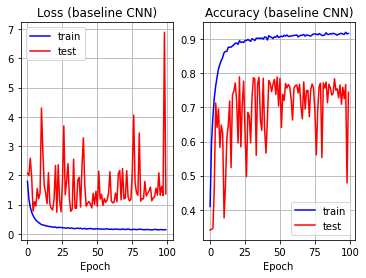

In [ ]:
# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)
model.save('/content/drive/MyDrive/CNN_baseline_model')

## Baseline example adapted from: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

## updated with cs231N architecture

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):

  # plot loss
  fig, (ax1,ax2) = plt.subplots(1,2)
  #pyplot.subplot(211)
  ax1.set_title('Loss (data augmentation)')
  ax1.plot(history.history['loss'], color='blue', label='train')
  ax1.plot(history.history['val_loss'], color='red', label='test')
  ax1.set_xlabel("Epoch ")
  #ax1.set_ylabel("Loss Value")

	# plot accuracy
	#pyplot.subplot(212)
  ax2.set_title('Accuracy (data augmentation)')
  ax2.set_xlabel("Epoch ")
  #ax2.set_ylabel("Accuracy")
  ax2.plot((history.history['accuracy']), color='blue', label='train')
  ax2.plot((history.history['val_accuracy']), color='red', label='test')
  ax1.legend()
  ax1.grid()
  #ax1.show()
  ax2.legend()
  ax2.grid()
  #ax2.show()
	# save plot to file
	#filename = sys.argv[0].split('/')[-1]
  plt.savefig('/content/drive/MyDrive/plot_data_aug_other_v3.png')
	#pyplot.close()

In [ ]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(x_train[0].shape)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#	model.add(MaxPooling2D((3, 3)))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(15, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model




# define model
model = define_model()
# fit model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
250/250 [==============================] - 10s 36ms/step - loss: 2.2768 - accuracy: 0.2548 - val_loss: 1.9196 - val_accuracy: 0.3872
Epoch 2/100
250/250 [==============================] - 8s 33ms/step - loss: 1.6980 - accuracy: 0.4517 - val_loss: 1.5340 - val_accuracy: 0.5007
Epoch 3/100
250/250 [==============================] - 8s 33ms/step - loss: 1.3412 - accuracy: 0.5567 - val_loss: 1.3123 - val_accuracy: 0.5654
Epoch 4/100
250/250 [==============================] - 8s 32ms/step - loss: 1.0705 - accuracy: 0.6387 - val_loss: 1.4196 - val_accuracy: 0.5219
Epoch 5/100
250/250 [==============================] - 8s 32ms/step - loss: 0.8672 - accuracy: 0.6993 - val_loss: 1.0248 - val_accuracy: 0.6393
Epoch 6/100
250/250 [==============================] - 8s 33ms/step - loss: 0.7116 - accuracy: 0.7472 - val_loss: 0.9216 - val_accuracy: 0.6810
Epoch 7/100
250/250 [==============================] - 8s 33ms/step - loss: 0.5578 - accuracy: 0.7913 - val_loss: 0.8433 - val_accuracy

167/167 [==============================] - 1s 6ms/step - loss: 0.9160 - accuracy: 0.7440
> 74.403


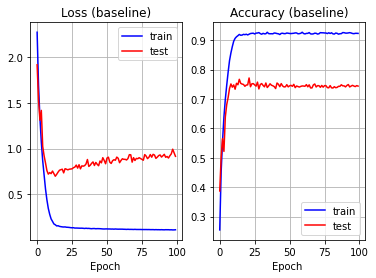

In [ ]:
# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

In [ ]:
model.save('/content/drive/MyDrive/baseline_model_other_v3')





INFO:tensorflow:Assets written to: /content/drive/MyDrive/baseline_model_other_v3/assets


### The updated VGG 3 baseline model with dropout is listed below.





In [ ]:


# define cnn model
def define_model():
	model = Sequential()


	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(x_train[0].shape)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(15, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 


In [ ]:
# define model
model = define_model()
# fit model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
250/250 [==============================] - 10s 37ms/step - loss: nan - accuracy: 0.0826 - val_loss: nan - val_accuracy: 0.0829
Epoch 2/100
250/250 [==============================] - 9s 34ms/step - loss: nan - accuracy: 0.0830 - val_loss: nan - val_accuracy: 0.0829
Epoch 3/100
250/250 [==============================] - 9s 34ms/step - loss: nan - accuracy: 0.0830 - val_loss: nan - val_accuracy: 0.0829
Epoch 4/100
250/250 [==============================] - 9s 34ms/step - loss: nan - accuracy: 0.0830 - val_loss: nan - val_accuracy: 0.0829
Epoch 5/100
250/250 [==============================] - 9s 34ms/step - loss: nan - accuracy: 0.0830 - val_loss: nan - val_accuracy: 0.0829
Epoch 6/100
250/250 [==============================] - 9s 34ms/step - loss: nan - accuracy: 0.0830 - val_loss: nan - val_accuracy: 0.0829
Epoch 7/100
250/250 [==============================] - 9s 34ms/step - loss: nan - accuracy: 0.0830 - val_loss: nan - val_accuracy: 0.0829
Epoch 8/100
250/250 [============

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/other_dropout_model_v4')
model.summary()


INFO:tensorflow:Assets written to: /content/drive/MyDrive/other_dropout_model_v3/assets


## VGG3 baseline updated with weigth decay is shown below

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
250/250 [==============================] - 10s 37ms/step - loss: 3.4155 - accuracy: 0.2587 - val_loss: 3.0373 - val_accuracy: 0.3613
Epoch 2/100
250/250 [==============================] - 8s 33ms/step - loss: 2.7758 - accuracy: 0.4722 - val_loss: 2.6637 - val_accuracy: 0.4869
Epoch 3/100
250/250 [==============================] - 8s 33ms/step - loss: 2.4097 - accuracy: 0.5794 - val_loss: 2.3575 - val_accuracy: 0.5864
Epoch 4/100
250/250 [==============================] - 8s 33ms/step - loss: 2.1323 - accuracy: 0.6559 - val_loss: 2.1769 - val_accuracy: 0.6443
Epoch 5/100
250/250 [==============================] - 8s 33ms/step - loss: 1.9476 - accuracy: 0.7078 - val_loss: 2.0008 - val_accuracy: 0.6948
Epoch 6/100
250/250 [==============================] - 8s 33ms/step - loss: 1.7831 - accuracy: 0.7575 - val_loss: 1.9193 - val_accuracy: 0.7190
Epoch 7/100
250/250 [==============================] - 8s 33ms/step - loss: 1.6292 - accuracy: 0.8040 - val_loss: 1.8519 - val_accuracy

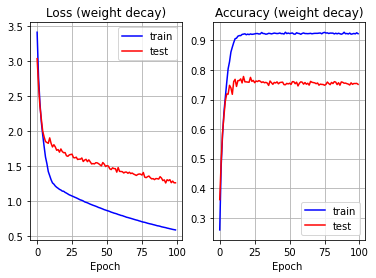

In [ ]:
import sys
from matplotlib import pyplot

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(x_train[0].shape)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
	model.add(Dense(15, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


 
# define model
model = define_model()
# fit model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)


In [ ]:
model.save('/content/drive/MyDrive/weight_decay_model_other_v3')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/weight_decay_model_other_v3/assets


## VGG 3 baseline updated with data augmentation step is hwon below

In [ ]:
# baseline model with data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
249/249 [==============================] - 41s 162ms/step - loss: 2.4869 - accuracy: 0.1790 - val_loss: 2.4411 - val_accuracy: 0.2022
Epoch 2/100
249/249 [==============================] - 40s 159ms/step - loss: 2.1973 - accuracy: 0.2885 - val_loss: 1.9308 - val_accuracy: 0.4156
Epoch 3/100
249/249 [==============================] - 40s 159ms/step - loss: 1.9046 - accuracy: 0.3822 - val_loss: 1.6550 - val_accuracy: 0.4692
Epoch 4/100
249/249 [==============================] - 39s 157ms/step - loss: 1.6916 - accuracy: 0.4506 - val_loss: 1.5160 - val_accuracy: 0.5127
Epoch 5/100
249/249 [==============================] - 39s 158ms/step - loss: 1.5251 - accuracy: 0.4986 - val_loss: 1.2868 - val_accuracy: 0.5868
Epoch 6/100
249/249 [==============================] - 39s 158ms/step - loss: 1.4127 - accuracy: 0.5339 - val_loss: 1.3055 - val_accuracy: 0.5701
Epoch 7/100
249/249 [==============================] - 39s 157ms/step - loss: 1.3098 - accuracy: 0.5633 - val_loss: 1.1477 -

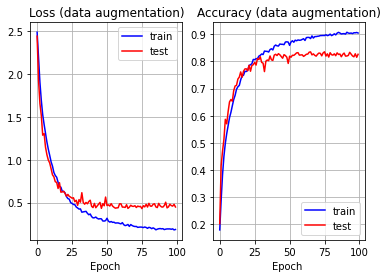

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(x_train[0].shape)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
	model.add(Dense(15, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


 

model = define_model()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)
# fit model
steps = int(x_train.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(x_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 25, 25, 128)     

In [ ]:
model.save('/content/drive/MyDrive/data_aug_model_other_v3')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_aug_model_other_v3/assets


Load desired models


In [ ]:
from tensorflow import keras
#model_drop = keras.models.load_model('/content/drive/MyDrive/baseline_model_other_v3')
model_aug = keras.models.load_model('/content/drive/MyDrive/data_aug_model_other_v3')
model_drop = keras.models.load_model('/content/drive/MyDrive/baseline_model_cs231n_v3')
model_aug_cs = keras.models.load_model('/content/drive/MyDrive/data_aug_model_v3')


# Validation Batch 1

0.9980064 1
0.73445904 4
0.9256719 1
0.3972806 4
0.99216825 1
0.65904975 10
0.9146496 8
0.9455604 1
0.50008047 10
0.9481668 1
0.99936074 1
0.7194455 4
0.7985501 4
0.7737393 4
0.9944047 1
['Claremont', 'Brackenfell', 'Rugby', 'Mitchells Plain', 'Milnerton', 'Matroosfontein', 'Manenberg', 'Lansdowne', 'Florida', 'Eversdal', 'Hout Bay', 'Guguletu', 'Khayelitsha', 'Philippi', 'Steenberg Estate']
['Steenberg Estate', 'Philippi', 'Steenberg Estate', 'Philippi', 'Steenberg Estate', 'Khayelitsha', 'Manenberg', 'Steenberg Estate', 'Khayelitsha', 'Steenberg Estate', 'Steenberg Estate', 'Philippi', 'Philippi', 'Philippi', 'Steenberg Estate']
 
 
3 correct predictions out of 15

Manenberg was CORRECTLY identified. 
Philippi was CORRECTLY identified. 
Steenberg Estate was CORRECTLY identified. 
 

Claremont was MISCLASSIFIED as Steenberg Estate
Brackenfell was MISCLASSIFIED as Philippi
Rugby was MISCLASSIFIED as Steenberg Estate
Mitchells Plain was MISCLASSIFIED as Philippi
Milnerton was MISCLASSIF

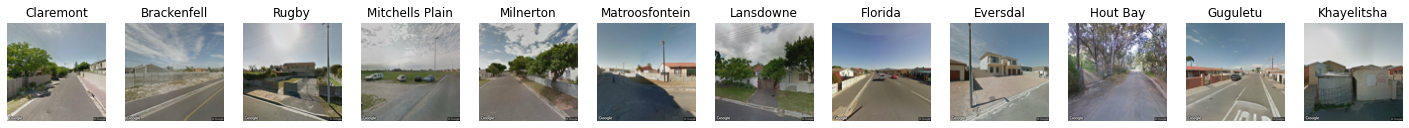

In [ ]:
from PIL import Image
correct_labels = ['Claremont','Brackenfell','Rugby','Mitchells Plain','Milnerton','Matroosfontein','Manenberg','Lansdowne','Florida','Eversdal','Hout Bay', 'Guguletu','Khayelitsha','Philippi','Steenberg Estate']
paths = ['/content/drive/MyDrive/zips/claremont_zip.zip (Unzipped Files)-20211013T102708Z-001.zip (Unzipped Files)/claremont_zip.zip (Unzipped Files)/14_Claremont18.jpg','/content/drive/MyDrive/zips/brackenzip.zip (Unzipped Files)/brackenzipUnzipped/15_Brackenfell10.jpg','/content/drive/MyDrive/rugby_zip.zip (Unzipped Files)/1_Rugby_34.jpg','/content/drive/MyDrive/mitchellsplain_zip.zip (Unzipped Files)/8_Mitchellsplain_54.jpg','/content/drive/MyDrive/milnerton_zip.zip (Unzipped Files)/7_Milnerton_3.jpg','/content/drive/MyDrive/matroosfontein_zip.zip (Unzipped Files)/6_Matroosfontein_25.jpg','/content/drive/MyDrive/manenberg_zip.zip (Unzipped Files)/9_Manenburg_107.jpg','/content/drive/MyDrive/lansdowne_zip.zip (Unzipped Files)/5_Lansdowne_122.jpg','/content/drive/MyDrive/Florida_zip.zip (Unzipped Files)/12_Florida_109.jpg','/content/drive/MyDrive/Eversdal_zip.zip (Unzipped Files)/13_Eversdal1003.jpg','/content/drive/MyDrive/houtbay_zip.zip (Unzipped Files)/11_HoutBay_87.jpg','/content/drive/MyDrive/guguletu_zip.zip (Unzipped Files)/4_Guguletu_1004.jpg','/content/drive/MyDrive/khayelitsha_zip.zip (Unzipped Files)/10_Khayelitsha_1002.jpg','/content/drive/MyDrive/philippi_zip (1).zip (Unzipped Files)/3_Philippi_57.jpg','/content/drive/MyDrive/steenbergzip.zip (Unzipped Files)/2_Steenberg_10.jpg']
#img_path = ('/content/drive/MyDrive/houtbay_zip.zip (Unzipped Files)/11_HoutBay_87.jpg')
actual_aug =[]
pred_vals =[]
predicted_labels = []
actual_drop =[]
testing_images =[]
class_pred =[]
class_nums =[]
class_nums.append(11)
class_nums.append(4)
class_nums.append(10)
class_nums.append(3)
class_nums.append(2)
for i in range(len(paths)):
  img = Image.open(paths[i])
  image_size = 100
  img = img.resize((image_size,image_size))
  img = np.array(img)
  img = img / 255.0
  img = img.reshape(1,image_size,image_size,3)
  testing_images.append(img)
  model_drop.predict(img)
  pred_probab = model_drop.predict(img)[0]
  pred_class = list(pred_probab).index(max(pred_probab))
  print(max(pred_probab), pred_class)
  #plt.imshow(img)
  y_classes = pred_probab.argmax(axis=-1)
  class_pred.append(pred_probab)
  predicted_labels.append(labels[y_classes])
  pred_vals.append(max(pred_probab))

testing_images = np.array(testing_images)
class_pred = np.array(class_pred)
#print(actual_drop)
#print(actual_aug)
#print(labels[y_classes])
print(correct_labels)
print(predicted_labels)
print(' ')
total = len(correct_labels)
count = 0
incorrect_indices =[]
correct_string = ''
incorrect_string =''
for i in range(len(correct_labels)):
  if correct_labels[i]==predicted_labels[i]:
    count = count +1
    correct_string = correct_string+ '\n'+(correct_labels[i] + ' was CORRECTLY identified. ')
  else:
    incorrect_indices.append(i)
    incorrect_string = incorrect_string + '\n'+(correct_labels[i] +' was MISCLASSIFIED as '+ predicted_labels[i])


print(' ')
print(str(count)+' correct predictions out of '+str(total))
print(correct_string)
print(' ')
print(incorrect_string)
print(' ')
#plt.imshow(testing_images[2].reshape(100,100,3))


print(' ')
# create figure
fig = plt.figure(figsize=(25, 15))
  
# setting values to rows and column variables
rows = 1
columns = total-count


for i in range(len(incorrect_indices)):
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i+1)
  
  # showing image
  plt.imshow(testing_images[incorrect_indices[i]].reshape(100,100,3))
  plt.axis('off')
  plt.title(correct_labels[incorrect_indices[i]])






In [ ]:
plt.savefig('/content/drive/MyDrive/validation_plot1.png')

<Figure size 432x288 with 0 Axes>

# Validation Batch 2

0.9203723 1
0.97599244 1
0.999686 1
0.78944606 5
0.5325434 10
0.54719627 4
0.42683467 9
0.8241909 9
0.5136504 14
0.8536375 1
0.6874983 11
0.7974968 12
0.8233861 10
0.77020264 4
0.45006344 4
['Claremont', 'Brackenfell', 'Rugby', 'Mitchells Plain', 'Milnerton', 'Matroosfontein', 'Manenberg', 'Lansdowne', 'Florida', 'Eversdal', 'Hout Bay', 'Guguletu', 'Khayelitsha', 'Philippi', 'Steenberg Estate']
['Steenberg Estate', 'Steenberg Estate', 'Steenberg Estate', 'Mitchells Plain', 'Khayelitsha', 'Philippi', 'Lansdowne', 'Lansdowne', 'Eversdal', 'Steenberg Estate', 'Hout Bay', 'Guguletu', 'Khayelitsha', 'Philippi', 'Philippi']
 
 
6 correct predictions out of 15

Mitchells Plain was CORRECTLY identified. 
Lansdowne was CORRECTLY identified. 
Hout Bay was CORRECTLY identified. 
Guguletu was CORRECTLY identified. 
Khayelitsha was CORRECTLY identified. 
Philippi was CORRECTLY identified. 
 

Claremont was MISCLASSIFIED as Steenberg Estate
Brackenfell was MISCLASSIFIED as Steenberg Estate
Rugby was

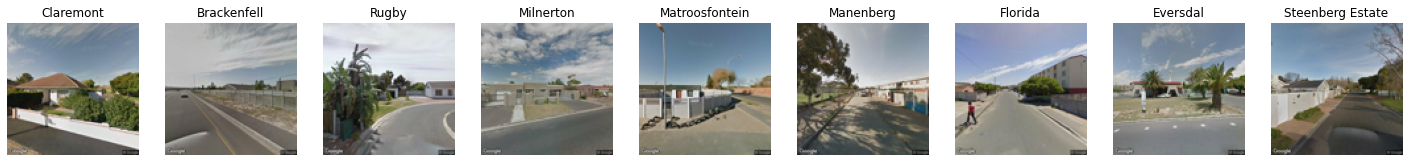

In [ ]:
from PIL import Image
correct_labels = ['Claremont','Brackenfell','Rugby','Mitchells Plain','Milnerton','Matroosfontein','Manenberg','Lansdowne','Florida','Eversdal','Hout Bay', 'Guguletu','Khayelitsha','Philippi','Steenberg Estate']
paths = ['/content/drive/MyDrive/zips/claremont_zip.zip (Unzipped Files)-20211013T102708Z-001.zip (Unzipped Files)/claremont_zip.zip (Unzipped Files)/14_Claremont100.jpg','/content/drive/MyDrive/zips/brackenzip.zip (Unzipped Files)/brackenzipUnzipped/15_Brackenfell12.jpg','/content/drive/MyDrive/rugby_zip.zip (Unzipped Files)/1_Rugby_133.jpg','/content/drive/MyDrive/mitchellsplain_zip.zip (Unzipped Files)/8_Mitchellsplain_320.jpg','/content/drive/MyDrive/milnerton_zip.zip (Unzipped Files)/7_Milnerton_45.jpg','/content/drive/MyDrive/matroosfontein_zip.zip (Unzipped Files)/6_Matroosfontein_458.jpg','/content/drive/MyDrive/manenberg_zip.zip (Unzipped Files)/9_Manenburg_928.jpg','/content/drive/MyDrive/lansdowne_zip.zip (Unzipped Files)/5_Lansdowne_87.jpg','/content/drive/MyDrive/Florida_zip.zip (Unzipped Files)/12_Florida_87.jpg','/content/drive/MyDrive/Eversdal_zip.zip (Unzipped Files)/13_Eversdal103.jpg','/content/drive/MyDrive/houtbay_zip.zip (Unzipped Files)/11_HoutBay_827.jpg','/content/drive/MyDrive/guguletu_zip.zip (Unzipped Files)/4_Guguletu_104.jpg','/content/drive/MyDrive/khayelitsha_zip.zip (Unzipped Files)/10_Khayelitsha_102.jpg','/content/drive/MyDrive/philippi_zip (1).zip (Unzipped Files)/3_Philippi_157.jpg','/content/drive/MyDrive/steenbergzip.zip (Unzipped Files)/2_Steenberg_100.jpg']
#img_path = ('/content/drive/MyDrive/houtbay_zip.zip (Unzipped Files)/11_HoutBay_87.jpg')
actual_aug =[]
pred_vals =[]
predicted_labels = []
actual_drop =[]
testing_images =[]
class_pred =[]
class_nums =[]
class_nums.append(11)
class_nums.append(4)
class_nums.append(10)
class_nums.append(3)
class_nums.append(2)
for i in range(len(paths)):
  img = Image.open(paths[i])
  image_size = 100
  img = img.resize((image_size,image_size))
  img = np.array(img)
  img = img / 255.0
  img = img.reshape(1,image_size,image_size,3)
  testing_images.append(img)
  model_drop.predict(img)
  pred_probab = model_drop.predict(img)[0]
  pred_class = list(pred_probab).index(max(pred_probab))
  print(max(pred_probab), pred_class)
  #plt.imshow(img)
  y_classes = pred_probab.argmax(axis=-1)
  class_pred.append(pred_probab)
  predicted_labels.append(labels[y_classes])
  pred_vals.append(max(pred_probab))

testing_images = np.array(testing_images)
class_pred = np.array(class_pred)
#print(actual_drop)
#print(actual_aug)
#print(labels[y_classes])
print(correct_labels)
print(predicted_labels)
print(' ')
total = len(correct_labels)
count = 0
incorrect_indices =[]
correct_string = ''
incorrect_string =''
for i in range(len(correct_labels)):
  if correct_labels[i]==predicted_labels[i]:
    count = count +1
    correct_string = correct_string+ '\n'+(correct_labels[i] + ' was CORRECTLY identified. ')
  else:
    incorrect_indices.append(i)
    incorrect_string = incorrect_string + '\n'+(correct_labels[i] +' was MISCLASSIFIED as '+ predicted_labels[i])


print(' ')
print(str(count)+' correct predictions out of '+str(total))
print(correct_string)
print(' ')
print(incorrect_string)
print(' ')
#plt.imshow(testing_images[2].reshape(100,100,3))


print(' ')
# create figure
fig = plt.figure(figsize=(25, 15))
  
# setting values to rows and column variables
rows = 1
columns = total-count


for i in range(len(incorrect_indices)):
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i+1)
  
  # showing image
  plt.imshow(testing_images[incorrect_indices[i]].reshape(100,100,3))
  plt.axis('off')
  plt.title(correct_labels[incorrect_indices[i]])

In [ ]:
plt.savefig('/content/drive/MyDrive/validation_plot2.png')

<Figure size 432x288 with 0 Axes>

# Data aug model - scratch

0.42802408 9
0.51958936 9
0.43814498 9
0.44909155 9
0.4729197 8
0.72220635 9
0.62956274 9
0.4572634 8
0.75807506 9
0.7095268 9
0.6428863 9
0.8096699 9
0.6293796 9
0.7009688 9
0.4220569 9
['Claremont', 'Brackenfell', 'Rugby', 'Mitchells Plain', 'Milnerton', 'Matroosfontein', 'Manenberg', 'Lansdowne', 'Florida', 'Eversdal', 'Hout Bay', 'Guguletu', 'Khayelitsha', 'Philippi', 'Steenberg Estate']
['Lansdowne', 'Lansdowne', 'Lansdowne', 'Lansdowne', 'Manenberg', 'Lansdowne', 'Lansdowne', 'Manenberg', 'Lansdowne', 'Lansdowne', 'Lansdowne', 'Lansdowne', 'Lansdowne', 'Lansdowne', 'Lansdowne']
 
 
0 correct predictions out of 15

 

Claremont was MISCLASSIFIED as Lansdowne
Brackenfell was MISCLASSIFIED as Lansdowne
Rugby was MISCLASSIFIED as Lansdowne
Mitchells Plain was MISCLASSIFIED as Lansdowne
Milnerton was MISCLASSIFIED as Manenberg
Matroosfontein was MISCLASSIFIED as Lansdowne
Manenberg was MISCLASSIFIED as Lansdowne
Lansdowne was MISCLASSIFIED as Manenberg
Florida was MISCLASSIFIED as Lan

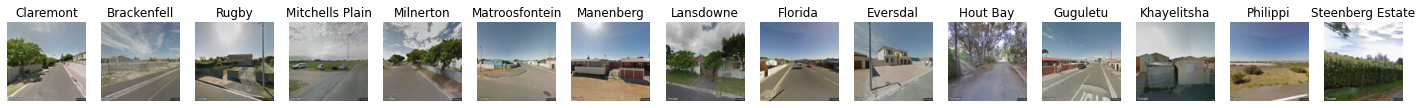

In [ ]:
from PIL import Image
correct_labels = ['Claremont','Brackenfell','Rugby','Mitchells Plain','Milnerton','Matroosfontein','Manenberg','Lansdowne','Florida','Eversdal','Hout Bay', 'Guguletu','Khayelitsha','Philippi','Steenberg Estate']
paths = ['/content/drive/MyDrive/zips/claremont_zip.zip (Unzipped Files)-20211013T102708Z-001.zip (Unzipped Files)/claremont_zip.zip (Unzipped Files)/14_Claremont18.jpg','/content/drive/MyDrive/zips/brackenzip.zip (Unzipped Files)/brackenzipUnzipped/15_Brackenfell10.jpg','/content/drive/MyDrive/rugby_zip.zip (Unzipped Files)/1_Rugby_34.jpg','/content/drive/MyDrive/mitchellsplain_zip.zip (Unzipped Files)/8_Mitchellsplain_54.jpg','/content/drive/MyDrive/milnerton_zip.zip (Unzipped Files)/7_Milnerton_3.jpg','/content/drive/MyDrive/matroosfontein_zip.zip (Unzipped Files)/6_Matroosfontein_58.jpg','/content/drive/MyDrive/manenberg_zip.zip (Unzipped Files)/9_Manenburg_107.jpg','/content/drive/MyDrive/lansdowne_zip.zip (Unzipped Files)/5_Lansdowne_122.jpg','/content/drive/MyDrive/Florida_zip.zip (Unzipped Files)/12_Florida_109.jpg','/content/drive/MyDrive/Eversdal_zip.zip (Unzipped Files)/13_Eversdal1003.jpg','/content/drive/MyDrive/houtbay_zip.zip (Unzipped Files)/11_HoutBay_87.jpg','/content/drive/MyDrive/guguletu_zip.zip (Unzipped Files)/4_Guguletu_1004.jpg','/content/drive/MyDrive/khayelitsha_zip.zip (Unzipped Files)/10_Khayelitsha_1002.jpg','/content/drive/MyDrive/philippi_zip (1).zip (Unzipped Files)/3_Philippi_57.jpg','/content/drive/MyDrive/steenbergzip.zip (Unzipped Files)/2_Steenberg_10.jpg']
#img_path = ('/content/drive/MyDrive/houtbay_zip.zip (Unzipped Files)/11_HoutBay_87.jpg')
actual_aug =[]
pred_vals =[]
predicted_labels = []
actual_drop =[]
testing_images =[]
class_pred =[]
class_nums =[]
class_nums.append(11)
class_nums.append(4)
class_nums.append(10)
class_nums.append(3)
class_nums.append(2)
for i in range(len(paths)):
  img = Image.open(paths[i])
  image_size = 100
  img = img.resize((image_size,image_size))
  img = np.array(img)
  img = img / 255.0
  img = img.reshape(1,image_size,image_size,3)
  testing_images.append(img)
  model_aug.predict(img)
  pred_probab = model_aug.predict(img)[0]
  pred_class = list(pred_probab).index(max(pred_probab))
  print(max(pred_probab), pred_class)
  #plt.imshow(img)
  y_classes = pred_probab.argmax(axis=-1)
  class_pred.append(pred_probab)
  predicted_labels.append(labels[y_classes])
  pred_vals.append(max(pred_probab))

testing_images = np.array(testing_images)
class_pred = np.array(class_pred)
#print(actual_drop)
#print(actual_aug)
#print(labels[y_classes])
print(correct_labels)
print(predicted_labels)
print(' ')
total = len(correct_labels)
count = 0
incorrect_indices =[]
correct_string = ''
incorrect_string =''
for i in range(len(correct_labels)):
  if correct_labels[i]==predicted_labels[i]:
    count = count +1
    correct_string = correct_string+ '\n'+(correct_labels[i] + ' was CORRECTLY identified. ')
  else:
    incorrect_indices.append(i)
    incorrect_string = incorrect_string + '\n'+(correct_labels[i] +' was MISCLASSIFIED as '+ predicted_labels[i])


print(' ')
print(str(count)+' correct predictions out of '+str(total))
print(correct_string)
print(' ')
print(incorrect_string)
print(' ')
#plt.imshow(testing_images[2].reshape(100,100,3))


print(' ')
# create figure
fig = plt.figure(figsize=(25, 15))
  
# setting values to rows and column variables
rows = 1
columns = total-count


for i in range(len(incorrect_indices)):
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i+1)
  
  # showing image
  plt.imshow(testing_images[incorrect_indices[i]].reshape(100,100,3))
  plt.axis('off')
  plt.title(correct_labels[incorrect_indices[i]])






# dropout cs23 model


0.99996746 1
0.8461429 1
0.5255209 1
0.6508857 1
0.99970466 1
0.6867482 4
0.54160964 1
0.9999242 9
0.76596224 10
0.99898773 1
0.38968605 2
0.49682525 10
0.55674016 4
0.58815414 10
0.9317171 1
['Claremont', 'Brackenfell', 'Rugby', 'Mitchells Plain', 'Milnerton', 'Matroosfontein', 'Manenberg', 'Lansdowne', 'Florida', 'Eversdal', 'Hout Bay', 'Guguletu', 'Khayelitsha', 'Philippi', 'Steenberg Estate']
['Steenberg Estate', 'Steenberg Estate', 'Steenberg Estate', 'Steenberg Estate', 'Steenberg Estate', 'Philippi', 'Steenberg Estate', 'Lansdowne', 'Khayelitsha', 'Steenberg Estate', 'Claremont', 'Khayelitsha', 'Philippi', 'Khayelitsha', 'Steenberg Estate']
 
 
2 correct predictions out of 15

Lansdowne was CORRECTLY identified. 
Steenberg Estate was CORRECTLY identified. 
 

Claremont was MISCLASSIFIED as Steenberg Estate
Brackenfell was MISCLASSIFIED as Steenberg Estate
Rugby was MISCLASSIFIED as Steenberg Estate
Mitchells Plain was MISCLASSIFIED as Steenberg Estate
Milnerton was MISCLASSIFIED

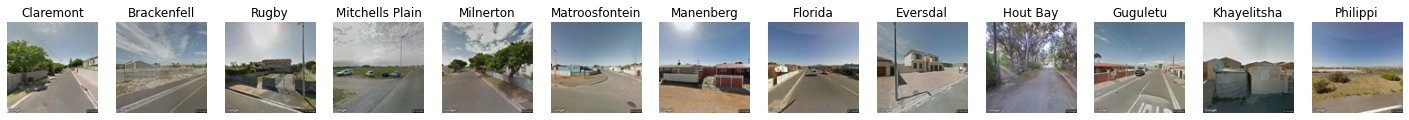

In [ ]:
from PIL import Image
correct_labels = ['Claremont','Brackenfell','Rugby','Mitchells Plain','Milnerton','Matroosfontein','Manenberg','Lansdowne','Florida','Eversdal','Hout Bay', 'Guguletu','Khayelitsha','Philippi','Steenberg Estate']
paths = ['/content/drive/MyDrive/zips/claremont_zip.zip (Unzipped Files)-20211013T102708Z-001.zip (Unzipped Files)/claremont_zip.zip (Unzipped Files)/14_Claremont18.jpg','/content/drive/MyDrive/zips/brackenzip.zip (Unzipped Files)/brackenzipUnzipped/15_Brackenfell10.jpg','/content/drive/MyDrive/rugby_zip.zip (Unzipped Files)/1_Rugby_34.jpg','/content/drive/MyDrive/mitchellsplain_zip.zip (Unzipped Files)/8_Mitchellsplain_54.jpg','/content/drive/MyDrive/milnerton_zip.zip (Unzipped Files)/7_Milnerton_3.jpg','/content/drive/MyDrive/matroosfontein_zip.zip (Unzipped Files)/6_Matroosfontein_58.jpg','/content/drive/MyDrive/manenberg_zip.zip (Unzipped Files)/9_Manenburg_107.jpg','/content/drive/MyDrive/lansdowne_zip.zip (Unzipped Files)/5_Lansdowne_122.jpg','/content/drive/MyDrive/Florida_zip.zip (Unzipped Files)/12_Florida_109.jpg','/content/drive/MyDrive/Eversdal_zip.zip (Unzipped Files)/13_Eversdal1003.jpg','/content/drive/MyDrive/houtbay_zip.zip (Unzipped Files)/11_HoutBay_87.jpg','/content/drive/MyDrive/guguletu_zip.zip (Unzipped Files)/4_Guguletu_1004.jpg','/content/drive/MyDrive/khayelitsha_zip.zip (Unzipped Files)/10_Khayelitsha_1002.jpg','/content/drive/MyDrive/philippi_zip (1).zip (Unzipped Files)/3_Philippi_57.jpg','/content/drive/MyDrive/steenbergzip.zip (Unzipped Files)/2_Steenberg_10.jpg']
#img_path = ('/content/drive/MyDrive/houtbay_zip.zip (Unzipped Files)/11_HoutBay_87.jpg')
actual_aug =[]
pred_vals =[]
predicted_labels = []
actual_drop =[]
testing_images =[]
class_pred =[]
class_nums =[]
class_nums.append(11)
class_nums.append(4)
class_nums.append(10)
class_nums.append(3)
class_nums.append(2)
for i in range(len(paths)):
  img = Image.open(paths[i])
  image_size = 100
  img = img.resize((image_size,image_size))
  img = np.array(img)
  img = img / 255.0
  img = img.reshape(1,image_size,image_size,3)
  testing_images.append(img)
  models_drop_cs.predict(img)
  pred_probab = models_drop_cs.predict(img)[0]
  pred_class = list(pred_probab).index(max(pred_probab))
  print(max(pred_probab), pred_class)
  #plt.imshow(img)
  y_classes = pred_probab.argmax(axis=-1)
  class_pred.append(pred_probab)
  predicted_labels.append(labels[y_classes])
  pred_vals.append(max(pred_probab))

testing_images = np.array(testing_images)
class_pred = np.array(class_pred)
#print(actual_drop)
#print(actual_aug)
#print(labels[y_classes])
print(correct_labels)
print(predicted_labels)
print(' ')
total = len(correct_labels)
count = 0
incorrect_indices =[]
correct_string = ''
incorrect_string =''
for i in range(len(correct_labels)):
  if correct_labels[i]==predicted_labels[i]:
    count = count +1
    correct_string = correct_string+ '\n'+(correct_labels[i] + ' was CORRECTLY identified. ')
  else:
    incorrect_indices.append(i)
    incorrect_string = incorrect_string + '\n'+(correct_labels[i] +' was MISCLASSIFIED as '+ predicted_labels[i])


print(' ')
print(str(count)+' correct predictions out of '+str(total))
print(correct_string)
print(' ')
print(incorrect_string)
print(' ')
#plt.imshow(testing_images[2].reshape(100,100,3))


print(' ')
# create figure
fig = plt.figure(figsize=(25, 15))
  
# setting values to rows and column variables
rows = 1
columns = total-count


for i in range(len(incorrect_indices)):
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i+1)
  
  # showing image
  plt.imshow(testing_images[incorrect_indices[i]].reshape(100,100,3))
  plt.axis('off')
  plt.title(correct_labels[incorrect_indices[i]])






# data aug model cs23

0.8656859 11
0.42135417 10
0.4284166 11
0.9689242 5
0.5221036 1
0.97838837 11
0.99997807 11
0.9999455 9
0.67421496 11
0.89040786 1
0.78372014 1
0.9993363 11
0.69510394 10
0.65511 11
0.9436877 11
['Claremont', 'Brackenfell', 'Rugby', 'Mitchells Plain', 'Milnerton', 'Matroosfontein', 'Manenberg', 'Lansdowne', 'Florida', 'Eversdal', 'Hout Bay', 'Guguletu', 'Khayelitsha', 'Philippi', 'Steenberg Estate']
['Hout Bay', 'Khayelitsha', 'Hout Bay', 'Mitchells Plain', 'Steenberg Estate', 'Hout Bay', 'Hout Bay', 'Lansdowne', 'Hout Bay', 'Steenberg Estate', 'Steenberg Estate', 'Hout Bay', 'Khayelitsha', 'Hout Bay', 'Hout Bay']
 
 
3 correct predictions out of 15

Mitchells Plain was CORRECTLY identified. 
Lansdowne was CORRECTLY identified. 
Khayelitsha was CORRECTLY identified. 
 

Claremont was MISCLASSIFIED as Hout Bay
Brackenfell was MISCLASSIFIED as Khayelitsha
Rugby was MISCLASSIFIED as Hout Bay
Milnerton was MISCLASSIFIED as Steenberg Estate
Matroosfontein was MISCLASSIFIED as Hout Bay
Manen

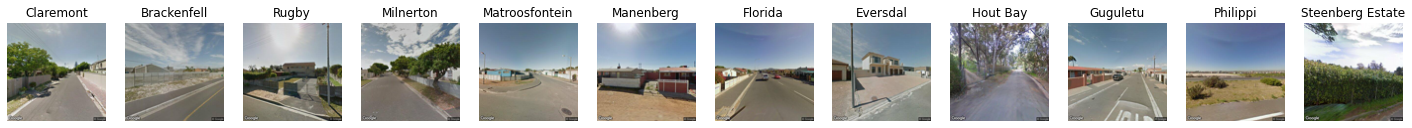

In [ ]:
from PIL import Image
correct_labels = ['Claremont','Brackenfell','Rugby','Mitchells Plain','Milnerton','Matroosfontein','Manenberg','Lansdowne','Florida','Eversdal','Hout Bay', 'Guguletu','Khayelitsha','Philippi','Steenberg Estate']
paths = ['/content/drive/MyDrive/zips/claremont_zip.zip (Unzipped Files)-20211013T102708Z-001.zip (Unzipped Files)/claremont_zip.zip (Unzipped Files)/14_Claremont18.jpg','/content/drive/MyDrive/zips/brackenzip.zip (Unzipped Files)/brackenzipUnzipped/15_Brackenfell10.jpg','/content/drive/MyDrive/rugby_zip.zip (Unzipped Files)/1_Rugby_34.jpg','/content/drive/MyDrive/mitchellsplain_zip.zip (Unzipped Files)/8_Mitchellsplain_54.jpg','/content/drive/MyDrive/milnerton_zip.zip (Unzipped Files)/7_Milnerton_3.jpg','/content/drive/MyDrive/matroosfontein_zip.zip (Unzipped Files)/6_Matroosfontein_58.jpg','/content/drive/MyDrive/manenberg_zip.zip (Unzipped Files)/9_Manenburg_107.jpg','/content/drive/MyDrive/lansdowne_zip.zip (Unzipped Files)/5_Lansdowne_122.jpg','/content/drive/MyDrive/Florida_zip.zip (Unzipped Files)/12_Florida_109.jpg','/content/drive/MyDrive/Eversdal_zip.zip (Unzipped Files)/13_Eversdal1003.jpg','/content/drive/MyDrive/houtbay_zip.zip (Unzipped Files)/11_HoutBay_87.jpg','/content/drive/MyDrive/guguletu_zip.zip (Unzipped Files)/4_Guguletu_1004.jpg','/content/drive/MyDrive/khayelitsha_zip.zip (Unzipped Files)/10_Khayelitsha_1002.jpg','/content/drive/MyDrive/philippi_zip (1).zip (Unzipped Files)/3_Philippi_57.jpg','/content/drive/MyDrive/steenbergzip.zip (Unzipped Files)/2_Steenberg_10.jpg']
#img_path = ('/content/drive/MyDrive/houtbay_zip.zip (Unzipped Files)/11_HoutBay_87.jpg')
actual_aug =[]
pred_vals =[]
predicted_labels = []
actual_drop =[]
testing_images =[]
class_pred =[]
class_nums =[]
class_nums.append(11)
class_nums.append(4)
class_nums.append(10)
class_nums.append(3)
class_nums.append(2)
for i in range(len(paths)):
  img = Image.open(paths[i])
  image_size = 100
  img = img.resize((image_size,image_size))
  img = np.array(img)
  img = img / 255.0
  img = img.reshape(1,image_size,image_size,3)
  testing_images.append(img)
  model_aug_cs.predict(img)
  pred_probab = model_aug_cs.predict(img)[0]
  pred_class = list(pred_probab).index(max(pred_probab))
  print(max(pred_probab), pred_class)
  #plt.imshow(img)
  y_classes = pred_probab.argmax(axis=-1)
  class_pred.append(pred_probab)
  predicted_labels.append(labels[y_classes])
  pred_vals.append(max(pred_probab))

testing_images = np.array(testing_images)
class_pred = np.array(class_pred)
#print(actual_drop)
#print(actual_aug)
#print(labels[y_classes])
print(correct_labels)
print(predicted_labels)
print(' ')
total = len(correct_labels)
count = 0
incorrect_indices =[]
correct_string = ''
incorrect_string =''
for i in range(len(correct_labels)):
  if correct_labels[i]==predicted_labels[i]:
    count = count +1
    correct_string = correct_string+ '\n'+(correct_labels[i] + ' was CORRECTLY identified. ')
  else:
    incorrect_indices.append(i)
    incorrect_string = incorrect_string + '\n'+(correct_labels[i] +' was MISCLASSIFIED as '+ predicted_labels[i])


print(' ')
print(str(count)+' correct predictions out of '+str(total))
print(correct_string)
print(' ')
print(incorrect_string)
print(' ')
#plt.imshow(testing_images[2].reshape(100,100,3))


print(' ')
# create figure
fig = plt.figure(figsize=(25, 15))
  
# setting values to rows and column variables
rows = 1
columns = total-count


for i in range(len(incorrect_indices)):
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i+1)
  
  # showing image
  plt.imshow(testing_images[incorrect_indices[i]].reshape(100,100,3))
  plt.axis('off')
  plt.title(correct_labels[incorrect_indices[i]])




